# UEP 239 Final Project
#### Jess Wilson - May 2021

---

### Goal of Project:
- Discover the most suitable zip code tabulation areas (ZCTAs) for young professionals to move to in Metro Boston. 

### Suitability Indicator Variables: 
1. Median rent payment (USD)
2. Population density (population per square km)
3. Proximity to farmer's markets (km)
4. Transit stop density (stop per square km)
5. Proximity to supermarkets (km)

---

#### Instructions on How to Run:
- All instructions can be found in the README.md, including how to load and run environment and download necessary datasets 
- Environment (environment.yml) and data directory (uep239-final-project-data) are located in repository

---

#### Importing Relevant Libraries:

In [1]:
import numpy as np               # Load numpy, for scientific computing
import pandas as pd              # Load pandas, for data frame manipulation 
import geopandas as gpd          # Load geopandas, for pandas manipulation with geospatial components
import matplotlib.pyplot as plt  # Load matplotlib, for plotting and mappingdata
import seaborn as sns            # Load seaborn, for additional plotting features 
import folium                    # Load folium, for interactive maps
import os                        # Load OS, for operating system work
import contextily as cx          # Load contextily, for basemaps

---

#### Setting Working Directory:

In [2]:
# Pass the raw string (r) path of the directory in which you downloaded the project data
os.chdir(os.path.dirname(r"z:/OneDrive/Documentos/GPwP/uep239-final-project/uep239-final-project-data/"))
# Print working directory
print("Path changed to: "+os.getcwd())

Path changed to: z:\OneDrive\Documentos\GPwP\uep239-final-project\uep239-final-project-data


---

#### Read in Relevant Data Sets and Clean Data:



---

**Population:**

In [3]:
# Read in ZCTA population data:
population_raw = pd.read_csv(r"tabular/Population/population.csv", skiprows = [1])

# Observe data:
population_raw.info()
population_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Columns: 458 entries, GEO_ID to S0101_C06_038M
dtypes: int64(186), object(272)
memory usage: 1.9+ MB


,GEO_ID,NAME,S0101_C01_001E,S0101_C01_001M,S0101_C01_002E,S0101_C01_002M,S0101_C01_003E,S0101_C01_003M,S0101_C01_004E,S0101_C01_004M,...,S0101_C06_034E,S0101_C06_034M,S0101_C06_035E,S0101_C06_035M,S0101_C06_036E,S0101_C06_036M,S0101_C06_037E,S0101_C06_037M,S0101_C06_038E,S0101_C06_038M
0,8600000US01001,ZCTA5 01001,17312,735,956,233,863,222,967,274,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
1,8600000US01002,ZCTA5 01002,30014,485,872,143,1043,192,1123,215,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,8600000US01003,ZCTA5 01003,11357,477,0,19,0,19,0,19,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
3,8600000US01005,ZCTA5 01005,5128,404,127,72,199,139,408,153,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
4,8600000US01007,ZCTA5 01007,15005,20,879,183,828,186,969,193,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


In [31]:
# Rename population and name columns:
population_raw.rename(columns = {'S0101_C01_001E' : 'Total_Population', 'NAME' : 'ZCTA'}, inplace = True)

# Remove "ZCTA5" from ZCTA column:
population_raw['ZCTA'] = population_raw['ZCTA'].map(lambda x: x.lstrip('ZCTA5 '))

# Subset data into only the necessary columns for analysis:
population = population_raw[["ZCTA", "Total_Population"]]
population.head()

,ZCTA,Total_Population
0,01001,17312
1,01002,30014
2,01003,11357
3,01005,5128
4,01007,15005


---

**Monthly Rent:**

In [5]:
# Read in median monthly rent data:
rent_raw = pd.read_csv(r"tabular/Rent/rent.csv", skiprows = [1])

# Observe data:
rent_raw.info()
rent_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Columns: 554 entries, GEO_ID to S2503_C06_046M
dtypes: int64(266), object(288)
memory usage: 2.3+ MB


,GEO_ID,NAME,S2503_C01_001E,S2503_C01_001M,S2503_C01_002E,S2503_C01_002M,S2503_C01_003E,S2503_C01_003M,S2503_C01_004E,S2503_C01_004M,...,S2503_C06_042E,S2503_C06_042M,S2503_C06_043E,S2503_C06_043M,S2503_C06_044E,S2503_C06_044M,S2503_C06_045E,S2503_C06_045M,S2503_C06_046E,S2503_C06_046M
0,8600000US01001,ZCTA5 01001,7413,322,230,138,163,105,320,113,...,15.6,6.9,1.6,1.8,0.0,1.7,2.1,1.7,7.9,3.5
1,8600000US01002,ZCTA5 01002,9798,451,562,198,376,130,465,212,...,9.3,3.0,10.7,3.7,2.6,2.2,6.3,3.2,1.1,0.9
2,8600000US01003,ZCTA5 01003,42,42,24,38,0,19,14,20,...,0.0,49.9,0.0,49.9,0.0,49.9,63.2,53.3,0.0,49.9
3,8600000US01005,ZCTA5 01005,1944,232,51,50,27,44,34,50,...,28.1,29.3,0.0,12.1,0.0,12.1,0.0,12.1,17.4,18.0
4,8600000US01007,ZCTA5 01007,5563,196,81,65,109,107,105,90,...,14.1,7.1,13.5,11.0,0.0,3.3,0.0,3.3,4.6,5.2


In [94]:
# Rename rent and name columns:
rent_raw.rename(columns = {"S2503_C05_024E" : "Median_Rent", 'NAME' : 'ZCTA'}, inplace = True)

# Remove "ZCTA5" from ZCTA "NAME" column:
rent_raw['ZCTA'] = rent_raw['ZCTA'].map(lambda x: x.lstrip('ZCTA5 '))

# Replace empty values:
rent_raw = rent_raw.replace('-', np.NaN)

# Change 'Median_Rent' to numeric:
mpo_zcta["Median_Rent"] = pd.to_numeric(mpo_zcta["Median_Rent"])

# Subset data into only the necessary columns for analysis:
rent = rent_raw[["ZCTA", "Median_Rent"]]
rent.head()

,ZCTA,Median_Rent
0,01001,1148
1,01002,1380
2,01003,NaN
3,01005,965
4,01007,975


---

**Grocery Stores:**

In [7]:
# Read in grocery store data:
grocery_raw = pd.read_csv(r"tabular/Supermarkets/supermarkets.csv")

# Observe data:
grocery_raw.info()
grocery_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  274 non-null    object 
 1   Address       274 non-null    object 
 2   City          274 non-null    object 
 3   State         274 non-null    object 
 4   ZIP Code      274 non-null    int64  
 5   Latitude      274 non-null    float64
 6   Longitude     274 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.1+ KB


,Company Name,Address,City,State,ZIP Code,Latitude,Longitude
0,99 Ranch Market,475 Hancock St # 2,Quincy,MA,2171,42.270653,-71.023292
1,Big Y,500 Staples Dr,Framingham,MA,1702,42.291206,-71.489449
2,Big Y,770 Cochituate Rd,Framingham,MA,1701,42.309146,-71.380338
3,Big Y,348 E Central St,Franklin,MA,2038,42.079076,-71.380864
4,Big Y,182 Summer St # 1,Kingston,MA,2364,42.011307,-70.735435


In [8]:
# Subset data into only the necessary columns for analysis:
grocery = grocery_raw[["Company Name", "Latitude", "Longitude"]]
grocery.head()

,Company Name,Latitude,Longitude
0,99 Ranch Market,42.270653,-71.023292
1,Big Y,42.291206,-71.489449
2,Big Y,42.309146,-71.380338
3,Big Y,42.079076,-71.380864
4,Big Y,42.011307,-70.735435


---

**MPO Boundaries:**

In [9]:
# Read in MPO boundary data:
mpo_raw = gpd.read_file(r"vector/MPO_Boundaries/mpo_boundaries.shp")

# Observe data:
mpo_raw.info()
mpo_raw.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    13 non-null     int64   
 1   MPO         13 non-null     object  
 2   created_us  0 non-null      object  
 3   created_da  13 non-null     object  
 4   last_edite  2 non-null      object  
 5   last_edi_1  13 non-null     object  
 6   GlobalID    13 non-null     object  
 7   ShapeSTAre  13 non-null     float64 
 8   ShapeSTLen  13 non-null     float64 
 9   geometry    13 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(6)
memory usage: 1.1+ KB


,OBJECTID,MPO,created_us,created_da,last_edite,last_edi_1,GlobalID,ShapeSTAre,ShapeSTLen,geometry
0,2,Berkshire,None,1970-01-01,None,1970-01-01,{08FDA544-18B0-412A-B442-287E53E987F7},2.451015e+09,2.471530e+05,"POLYGON ((-8128884.676 5272654.345, -8128962.2..."
1,3,Cape Cod,None,1970-01-01,None,1970-01-01,{B6CD90CF-2F7D-43F2-B251-FA7F8E00EF01},1.067067e+09,1.288227e+06,"MULTIPOLYGON (((-7813968.781 5173329.197, -781..."
2,4,Central Massachusetts,None,1970-01-01,None,1970-01-01,{CC777E14-53C8-42AD-B421-71444DA0BB60},2.487546e+09,2.683265e+05,"POLYGON ((-7977225.352 5223837.273, -7973861.8..."
3,5,Franklin,None,1970-01-01,None,1970-01-01,{4804E708-6B89-4A85-9383-BD91F7589981},1.876456e+09,2.527017e+05,"POLYGON ((-8046511.241 5269691.856, -8045276.8..."
4,6,Montachusett,None,1970-01-01,None,1970-01-01,{F315DA63-C9CF-40EE-8AA7-5ABA2E1FD528},1.772355e+09,2.748684e+05,"POLYGON ((-7976246.504 5267152.001, -7976121.9..."


In [45]:
# Filter MPO to Boston Region MPO:
mpo_raw = mpo_raw[mpo_raw.MPO == "Boston Region"]

# Subset data into only the necessary columns for analysis:
mpo = mpo_raw[["MPO", "geometry"]]
mpo.head()

,MPO,geometry
10,Boston Region,"MULTIPOLYGON (((-7875339.226 5247387.185, -787..."


---

**MA Town Boundaries:**

In [11]:
# Read in MA town boundary data:
town_raw = gpd.read_file(r"vector/Town_Boundaries/town_boundaries.shp")

# Observe data:
town_raw.info()
town_raw.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   TOWN        351 non-null    object  
 1   TOWN_ID     351 non-null    int64   
 2   POP1980     351 non-null    int64   
 3   POP1990     351 non-null    int64   
 4   POP2000     351 non-null    int64   
 5   POPCH90_00  351 non-null    int64   
 6   TYPE        351 non-null    object  
 7   FOURCOLOR   351 non-null    int64   
 8   FIPS_STCO   351 non-null    int64   
 9   SUM_ACRES   351 non-null    float64 
 10  SUM_SQUARE  351 non-null    float64 
 11  POP2010     351 non-null    int64   
 12  POPCH00_10  351 non-null    int64   
 13  POPCH80_90  351 non-null    int64   
 14  SHAPE_Leng  351 non-null    float64 
 15  SHAPE_Area  351 non-null    float64 
 16  geometry    351 non-null    geometry
dtypes: float64(4), geometry(1), int64(10), object(2)
memory usage: 46.7+ KB


,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH90_00,TYPE,FOURCOLOR,FIPS_STCO,SUM_ACRES,SUM_SQUARE,POP2010,POPCH00_10,POPCH80_90,SHAPE_Leng,SHAPE_Area,geometry
0,LOWELL,160,93473,103439,105167,1728,C,4,25017,9298.780,14.531,106519,1352,9966,28403.664058,3.763066e+07,"POLYGON ((216431.383 935122.985, 217384.292 93..."
1,BEVERLY,30,34575,38195,39862,1667,C,1,25009,9863.262,15.411,39502,-360,3620,38638.706350,3.991521e+07,"MULTIPOLYGON (((247412.633 926932.675, 249132...."
2,GLOUCESTER,107,28092,28716,30273,1557,C,3,25009,17088.570,26.700,28789,-1484,624,159379.402958,6.915496e+07,"MULTIPOLYGON (((264186.563 935044.815, 264207...."
3,CHESTER,59,1182,1280,1308,28,T,4,25013,23784.924,37.164,1337,29,98,37542.272855,9.625415e+07,"POLYGON ((80255.212 900279.565, 84998.072 8998..."
4,WINCHESTER,344,20021,20267,20810,543,T,2,25017,4062.159,6.347,21374,564,246,19080.564132,1.643902e+07,"POLYGON ((232109.422 913780.365, 231307.063 91..."


In [12]:
# Subset data into only the necessary columns for analysis:
town = town_raw[["TOWN", "TOWN_ID", "SHAPE_Leng", "SHAPE_Area", "geometry"]]
town.head()

,TOWN,TOWN_ID,SHAPE_Leng,SHAPE_Area,geometry
0,LOWELL,160,28403.664058,3.763066e+07,"POLYGON ((216431.383 935122.985, 217384.292 93..."
1,BEVERLY,30,38638.706350,3.991521e+07,"MULTIPOLYGON (((247412.633 926932.675, 249132...."
2,GLOUCESTER,107,159379.402958,6.915496e+07,"MULTIPOLYGON (((264186.563 935044.815, 264207...."
3,CHESTER,59,37542.272855,9.625415e+07,"POLYGON ((80255.212 900279.565, 84998.072 8998..."
4,WINCHESTER,344,19080.564132,1.643902e+07,"POLYGON ((232109.422 913780.365, 231307.063 91..."


---

**ZCTA Boundaries:**

In [13]:
# Read in ZCTA boundary data:
zcta_raw = gpd.read_file(r"vector/ZCTA_Boundaries/zcta_boundaries.shp")

# Observe data:
zcta_raw.info()
zcta_raw.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP10   538 non-null    object  
 1   ZCTA5CE10   538 non-null    object  
 2   GEOID10     538 non-null    object  
 3   CLASSFP10   538 non-null    object  
 4   MTFCC10     538 non-null    object  
 5   FUNCSTAT10  538 non-null    object  
 6   ALAND10     538 non-null    int64   
 7   AWATER10    538 non-null    int64   
 8   INTPTLAT10  538 non-null    object  
 9   INTPTLON10  538 non-null    object  
 10  PARTFLG10   538 non-null    object  
 11  geometry    538 non-null    geometry
dtypes: geometry(1), int64(2), object(9)
memory usage: 50.6+ KB


,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,25,02536,2502536,B5,G6350,S,71696166,9066635,+41.5969756,-070.5678768,N,"POLYGON ((-70.59239 41.56006, -70.59268 41.559..."
1,25,02556,2502556,B5,G6350,S,10034104,1164445,+41.6394454,-070.6245149,N,"POLYGON ((-70.62389 41.61673, -70.62633 41.617..."
2,25,02540,2502540,B5,G6350,S,27746696,4550024,+41.5741900,-070.6282848,N,"POLYGON ((-70.62389 41.61673, -70.62262 41.616..."
3,25,02646,2502646,B5,G6350,S,7798581,801405,+41.6705961,-070.0714493,N,"POLYGON ((-70.07925 41.67769, -70.07864 41.677..."
4,25,01237,2501237,B5,G6350,S,160121626,1140685,+42.5478177,-073.2680327,N,"POLYGON ((-73.23558 42.49333, -73.23587 42.493..."


In [36]:
# Rename ZCTA columns:
zcta_raw.rename(columns = {"ZCTA5CE10" : "ZCTA", "ALAND10" : "Area"}, inplace = True)

# Subset data into only the necessary columns for analysis:
zcta = zcta_raw[["ZCTA", "GEOID10", "Area", "geometry"]]
zcta.head()

,ZCTA,GEOID10,Area,geometry
0,02536,2502536,71696166,"POLYGON ((-70.59239 41.56006, -70.59268 41.559..."
1,02556,2502556,10034104,"POLYGON ((-70.62389 41.61673, -70.62633 41.617..."
2,02540,2502540,27746696,"POLYGON ((-70.62389 41.61673, -70.62262 41.616..."
3,02646,2502646,7798581,"POLYGON ((-70.07925 41.67769, -70.07864 41.677..."
4,01237,2501237,160121626,"POLYGON ((-73.23558 42.49333, -73.23587 42.493..."


---

**Transit Stops:**

In [19]:
# Read in transit stop data:
transit_raw = gpd.read_file(r"vector/Transit_Stops/transit_stops.shp")

# Observe data:
transit_raw.info()
transit_raw.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATION   166 non-null    object  
 1   LINE      166 non-null    object  
 2   TERMINUS  166 non-null    object  
 3   ROUTE     166 non-null    object  
 4   geometry  166 non-null    geometry
dtypes: geometry(1), object(4)
memory usage: 6.6+ KB


,STATION,LINE,TERMINUS,ROUTE,geometry
0,Ashmont,RED,Y,A - Ashmont C - Alewife,POINT (236007.538 892693.023)
1,Harvard,RED,N,A - Ashmont B - Braintree C - Alewife,POINT (231387.274 902684.016)
2,Kendall/MIT,RED,N,A - Ashmont B - Braintree C - Alewife,POINT (234087.917 901406.551)
3,Capen Street,RED,N,Mattapan Trolley,POINT (234055.438 890869.375)
4,Tufts Medical Center,ORANGE,N,Forest Hills to Oak Grove,POINT (235900.324 899934.313)


In [20]:
# Subset data into only the necessary columns for analysis:
transit = transit_raw[["STATION", "LINE", "geometry"]]
transit.head()

,STATION,LINE,geometry
0,Ashmont,RED,POINT (236007.538 892693.023)
1,Harvard,RED,POINT (231387.274 902684.016)
2,Kendall/MIT,RED,POINT (234087.917 901406.551)
3,Capen Street,RED,POINT (234055.438 890869.375)
4,Tufts Medical Center,ORANGE,POINT (235900.324 899934.313)


---

**Farmer's Markets:**

In [21]:
# Read in farmer's markets data:
market_raw = gpd.read_file(r"vector/Farmers_Markets/farmers_markets.shp")

# Observe data:
market_raw.info()
market_raw.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   MARKET_ID   301 non-null    float64 
 1   NAME        301 non-null    object  
 2   TYPE        301 non-null    object  
 3   ADDR_1      298 non-null    object  
 4   ADDR_2      280 non-null    object  
 5   TOWN        301 non-null    object  
 6   ZIP_CODE    301 non-null    object  
 7   DAY_TIME    301 non-null    object  
 8   DATES       300 non-null    object  
 9   UPDATE_DAT  301 non-null    object  
 10  YEAR_START  289 non-null    object  
 11  WEBSITE     225 non-null    object  
 12  EBT         160 non-null    object  
 13  WIC_CVV     0 non-null      object  
 14  COUPONS     251 non-null    object  
 15  LONGITUDE   301 non-null    float64 
 16  LATITUDE    301 non-null    float64 
 17  geometry    301 non-null    geometry
dtypes: float64(3), geometry(1), object(14)
mem

,MARKET_ID,NAME,TYPE,ADDR_1,ADDR_2,TOWN,ZIP_CODE,DAY_TIME,DATES,UPDATE_DAT,YEAR_START,WEBSITE,EBT,WIC_CVV,COUPONS,LONGITUDE,LATITUDE,geometry
0,606.0,Sustainable Nantucket/Wednesday,Farmers Markets,113 Pleasant St.,Next to Glidden's Seafood,Nantucket,02554,"Wednesday, 3:30 pm - 6:30 pm",July 6 to September 14,2016,2016,http://www.sustainablenantucket.org,EBT-SNAP Accepted,None,WIC & Senior Coupons Accepted,-70.09361,41.27301,POINT (317843.084 781295.223)
1,607.0,Holden/Market on Main at Jed's,Farmers Markets,450 Main St.,Jed's Hardware and Garden,Holden,01520,"Friday, 3:30 pm - 7:00 pm",May 20 to October 28,2016,2016,None,None,None,None,-71.83454,42.33213,POINT (172428.679 898013.943)
2,535.0,West Newton,Farmers Markets,Elm Street,off Washington Street,West Newton,02465,"Saturday, 10:00 am - 2:00 pm",June 18 to October 8,2016,2014,http://www.newtonma.gov/gov/parks,EBT-SNAP Accepted,None,WIC & Senior Coupons Accepted,-71.22932,42.34906,POINT (222302.311 899875.783)
3,538.0,Plainville,Farmers Markets,200 South Street,Old Wood School,Plainville,02762,"Sunday, 10:00 am - 2:00 pm",May 25 to November 2,2015,2014,http://www.plainvillefarmersmarket.com/,EBT-SNAP Accepted,None,WIC & Senior Coupons Accepted,-71.33843,42.00941,POINT (213383.817 862127.128)
4,539.0,Worcester Art Museum,Farmers Markets,Lancaster St.,Worcester Art Museum,Worcester,01609,"Saturdays, 10:00 am - 1:00 pm",July 11 to August 29,2015,2014,None,None,None,WIC & Senior Coupons Accepted,-71.80202,42.27328,POINT (175085.678 891467.195)


In [25]:
#Change column datatype from float to int
market_raw = market_raw.astype({"MARKET_ID" : int})

# Subset data into only the necessary columns for analysis:
market = market_raw[["MARKET_ID", "NAME", "TOWN", "ZIP_CODE", "geometry"]]
market.head()

,MARKET_ID,NAME,TOWN,ZIP_CODE,geometry
0,606,Sustainable Nantucket/Wednesday,Nantucket,02554,POINT (317843.084 781295.223)
1,607,Holden/Market on Main at Jed's,Holden,01520,POINT (172428.679 898013.943)
2,535,West Newton,West Newton,02465,POINT (222302.311 899875.783)
3,538,Plainville,Plainville,02762,POINT (213383.817 862127.128)
4,539,Worcester Art Museum,Worcester,01609,POINT (175085.678 891467.195)


---

#### Data Manipulation, Joining, and Reprojecting:

In [37]:
# Attribute join population and rent to ZCTA:
zcta = zcta.merge(population, on='ZCTA')
zcta = zcta.merge(rent, on='ZCTA')
zcta.head()

,ZCTA,GEOID10,Area,geometry,Total_Population,Median_Rent
0,02536,2502536,71696166,"POLYGON ((-70.59239 41.56006, -70.59268 41.559...",19630,1438
1,02556,2502556,10034104,"POLYGON ((-70.62389 41.61673, -70.62633 41.617...",2499,1416
2,02540,2502540,27746696,"POLYGON ((-70.62389 41.61673, -70.62262 41.616...",8346,1015
3,02646,2502646,7798581,"POLYGON ((-70.07925 41.67769, -70.07864 41.677...",2094,1339
4,01237,2501237,160121626,"POLYGON ((-73.23558 42.49333, -73.23587 42.493...",2488,1173


In [62]:
# Reproject MPO and ZCTA to MA state plane projected coordinate system (EPSG:26986):
mpo = mpo.to_crs('epsg:26986')
zcta = zcta.to_crs('epsg:26986')

# Spatial join MPO with ZCTA (intersect) :
mpo_zcta = gpd.sjoin(zcta, mpo, how="inner", op='intersects')

#Drop MPO index column:
mpo_zcta.drop('index_right', inplace=True, axis=1)
mpo_zcta.head()

,ZCTA,GEOID10,Area,geometry,Total_Population,Median_Rent,MPO
17,01905,2501905,9219345,"POLYGON ((243830.175 913871.662, 243877.753 91...",24580,1155,Boston Region
18,01904,2501904,11708211,"POLYGON ((245713.029 914796.777, 245700.484 91...",17294,1369,Boston Region
20,01930,2501930,67847425,"POLYGON ((261488.944 931180.988, 261745.067 93...",30162,1185,Boston Region
21,01915,2501915,39091336,"POLYGON ((250741.171 926889.812, 250787.714 92...",41885,1282,Boston Region
22,01921,2501921,61010486,"POLYGON ((236132.449 942516.916, 236156.282 94...",8282,870,Boston Region


In [65]:
# Convert grocery to gpd using lat/lon:
grocery = gpd.GeoDataFrame(grocery, geometry=gpd.points_from_xy(grocery.Longitude, grocery.Latitude))
grocery.head()

# Set projection to WGS 84:
grocery = grocery.set_crs('epsg:4326')

---

#### Creation of Basemap:

Text(0.5, 1.0, 'ZCTA Suitability for Young Professionals\n Living in Metro Boston')

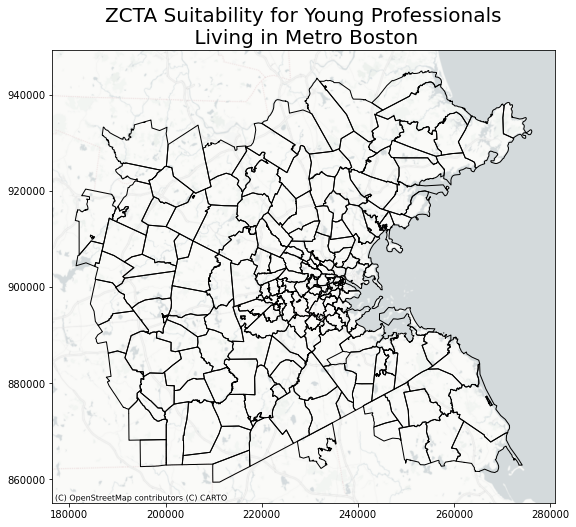

In [88]:
# mpo_zcta + town borders on top (separate maps)
ax = mpo_zcta.plot(facecolor = "none", edgecolor = 'black', figsize = (9, 9))
cx.add_basemap(ax, crs = mpo_zcta.crs, source=cx.providers.CartoDB.PositronNoLabels)
ax.set_title("ZCTA Suitability for Young Professionals\n Living in Metro Boston", fontsize=20)

---

#### Analysis of Suitability Indicator Variables:

1. Median rent payment (USD)
2. Population density (population per square km)
3. Proximity to farmer's markets (km)
4. Transit stop density (stop per square km)
5. Proximity to supermarkets (km)

---

**1. Median rent payment (USD):**

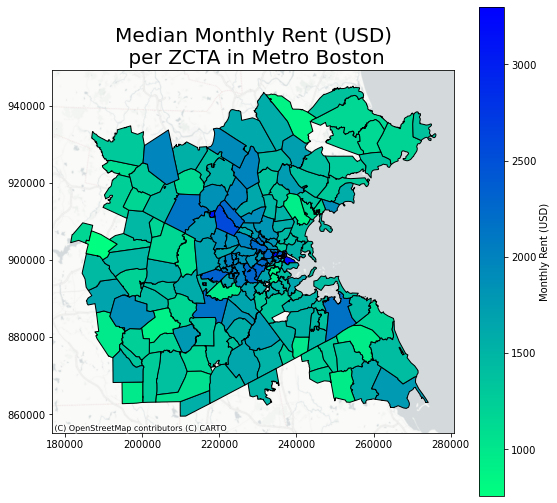

In [124]:
# Indicator variable (median rent per ZCTA) already summarized, so visualize median rent per ZCTA:
ax2 = mpo_zcta.plot(figsize = (9, 9),
                    column ='Median_Rent',
                    legend = True,
                    cmap = 'winter_r',
                    edgecolor = 'black',
                    legend_kwds = {'label' : "Monthly Rent (USD)"})

cx.add_basemap(ax2, crs = mpo_zcta.crs, source=cx.providers.CartoDB.PositronNoLabels)
ax2.set_title("Median Monthly Rent (USD)\n per ZCTA in Metro Boston", fontsize=20)

plt.show()

In [126]:
# Report highest ranking ZCTAs for Median Rent:
mpo_zcta.sort_values('Median_Rent', ascending = False).head()

,ZCTA,GEOID10,Area,geometry,Total_Population,Median_Rent,MPO
450,02142,2502142,716170,"POLYGON ((234257.854 901957.176, 234327.174 90...",3676,3301.0,Boston Region
391,02210,2502210,2399614,"POLYGON ((236840.995 900200.325, 236796.115 90...",3715,3174.0,Boston Region
231,01731,2501731,2049705,"POLYGON ((218695.745 912155.413, 218697.089 91...",2059,3143.0,Boston Region
118,02109,2502109,449654,"POLYGON ((236597.988 900807.986, 236554.100 90...",4190,2974.0,Boston Region
52,02110,2502110,479769,"POLYGON ((236597.988 900807.986, 236616.078 90...",2314,2960.0,Boston Region


In [132]:
# Report lowest ranking ZCTAs for Median Rent (without np.NaNs)
mpo_zcta.dropna().sort_values('Median_Rent', ascending = True).head(5)

,ZCTA,GEOID10,Area,geometry,Total_Population,Median_Rent,MPO
533,01503,2501503,33598202,"POLYGON ((192728.167 903499.368, 192620.359 90...",3182,756.0,Boston Region
22,01921,2501921,61010486,"POLYGON ((236132.449 942516.916, 236156.282 94...",8282,870.0,Boston Region
451,01746,2501746,48288456,"POLYGON ((206844.000 880879.735, 206832.270 88...",14724,897.0,Boston Region
184,02119,2502119,4136145,"POLYGON ((235079.178 898127.042, 235115.975 89...",27818,911.0,Boston Region
495,01906,2501906,27973350,"POLYGON ((238864.874 910791.214, 238841.230 91...",28222,919.0,Boston Region


In [162]:
# Convert indicator values into suitability score by normalizing values into suitability index ranging from zero to one using normalize function

# def normalize(dataset, min_value, max_value, reverse = False):
#     '''
#     A function that normalizes scalar numeric data into a 0 to 1 index, with 0 being less desireable and 1 more desireable. 
#     Requires numeric dataframe or geopandas dataframe, minimum value, and maximum value. If lower raw values are more desireable than higher raw values, 'reverse = True' will flip normalized output to reflect this.
#     '''
#     factor_score = []
#     for value in dataset:
#         normalized_value = (value - min_value) / (max_value - min_value)
#         if reverse == True:
#             reversed_value = 1 - normalized_value
#             factor_score.append(reversed_value)
#         else:
#             factor_score.append(normalized_value)
#     #dataset['factor_score'] = factor_score
    
# normalize(mpo_zcta.Median_Rent, 756.0, 3301.0, reverse = True)
# mpo_zcta.head()

def normalize(dataset, column, min_value, max_value, reverse = False):
    '''
    A function that normalizes scalar numeric data into a 0 to 1 index, with 0 being less desireable and 1 more desireable. 
    Requires numeric dataframe or geopandas dataframe, minimum value, and maximum value. If lower raw values are more desireable than higher raw values, 'reverse = True' will flip normalized output to reflect this.
    '''
    factor_score = []
    for value in column:
        normalized_value = (value - min_value) / (max_value - min_value)
        if reverse == True:
            reversed_value = 1 - normalized_value
            factor_score.append(reversed_value)
        else:
            factor_score.append(normalized_value)
    dataset['factor_score'] = pd.DataFrame(factor_score)
    print(factor_score)
    
normalize(mpo, mpo_zcta.Median_Rent, 756.0, 3301.0, reverse = True)
mpo_zcta.head()

[0.843222003929273, 0.7591355599214146, 0.831434184675835, 0.7933202357563851, 0.9552062868369352, 0.668762278978389, 0.6738703339882122, 0.5760314341846758, 0.6593320235756386, 0.7170923379174853, 0.6412573673870334, 0.7076620825147348, 0.7009823182711199, 0.8180746561886051, 0.8255402750491159, 0.6742632612966601, 0.5854616895874263, 0.7434184675834971, 0.13398821218074652, 0.7917485265225933, 0.9104125736738703, 0.6640471512770137, 0.6110019646365422, 0.7182711198428291, 0.762671905697446, 0.49233791748526523, 0.4015717092337917, 0.725343811394892, 0.28801571709233786, 0.5269155206286837, 0.7257367387033399, 0.7705304518664047, 0.8082514734774067, 0.6522593320235757, 0.7013752455795678, 0.9174852652259332, nan, 0.6907662082514735, 0.7410609037328094, 0.1284872298624754, 0.6436149312377211, 0.7076620825147348, nan, 0.9328094302554027, 0.8471512770137525, 0.762278978388998, 0.5422396856581533, 0.7493123772102162, 0.5037328094302553, 0.4722986247544204, 0.7013752455795678, 0.5139489194

,ZCTA,GEOID10,Area,geometry,Total_Population,Median_Rent,MPO
17,01905,2501905,9219345,"POLYGON ((243830.175 913871.662, 243877.753 91...",24580,1155.0,Boston Region
18,01904,2501904,11708211,"POLYGON ((245713.029 914796.777, 245700.484 91...",17294,1369.0,Boston Region
20,01930,2501930,67847425,"POLYGON ((261488.944 931180.988, 261745.067 93...",30162,1185.0,Boston Region
21,01915,2501915,39091336,"POLYGON ((250741.171 926889.812, 250787.714 92...",41885,1282.0,Boston Region
22,01921,2501921,61010486,"POLYGON ((236132.449 942516.916, 236156.282 94...",8282,870.0,Boston Region


---

**2. Population density (population per square km):**

In [ ]:
# Visualize spatial data - population per ZCTA

In [ ]:
# Summarize indicator values - population per square km per ZCTA:
# Density per ZCTA function

In [ ]:
# Visualize pop density per ZCTA

In [ ]:
# Produce ZCTA ranking based on mean/med rent, report highest and lowest ranking ZCTAs (e.g. top 5 and bottom 5)

In [ ]:
# Convert indicator values into suitability score by normalizing values into suitability index ranging from zero to one

---

**3. Proximity to farmer's markets (km):**

In [ ]:
# Visualize spatial data - farmer's market locations:

In [ ]:
# Summarize indicator values - closest farmer's market per ZCTA (euc dis):
# Closest POI function

In [ ]:
# Visualize closest farmer's market per ZCTA

In [ ]:
# Produce ZCTA ranking based on mean/med rent, report highest and lowest ranking ZCTAs (e.g. top 5 and bottom 5)

In [ ]:
# Convert indicator values into suitability score by normalizing values into suitability index ranging from zero to one

---

**4. Transit stop density (stop per square km):**

In [ ]:
# Visualize spatial data - bus and transit stop locations:

In [ ]:
# Summarize indicator values - stop per square km per ZCTA:
# Density per ZCTA function

In [ ]:
# Visualize transit stop density per ZCTA

In [ ]:
# Produce ZCTA ranking based on mean/med rent, report highest and lowest ranking ZCTAs (e.g. top 5 and bottom 5)

In [ ]:
# Convert indicator values into suitability score by normalizing values into suitability index ranging from zero to one

---

**5. Proximity to supermarkets (km):**

In [ ]:
# Visualize spatial data - grocery store locations:

In [ ]:
# Summarize indicator values - closest supermarket per ZCTA (euc dis):
# Closest POI function

In [ ]:
# Visualize closest supermarket per ZCTA

In [ ]:
# Produce ZCTA ranking based on mean/med rent, report highest and lowest ranking ZCTAs (e.g. top 5 and bottom 5)

In [ ]:
# Convert indicator values into suitability score by normalizing values into suitability index ranging from zero to one

---

#### Unweighted Suitability Index:

- Mean rent payment (USD) = 25%
- Population density (population per square km) = 25%
- Proximity to farmer's markets (km) = 25%
- Transit stop density (stop per square km) = 25%
- Proximity to supermarkets (km) = 25%

In [ ]:
unweighted = rent[score] + population[score] + market[score] + transit[score] + grocery [score]
unweighted_index_top = unweighted.sort_values('score',ascending=False).head()
unweighted_index_bottom = unweighted.sort_values('score',ascending=False).tail()

In [ ]:
#plot unweighted
#Interactive map needs to be in WGS84 CRS

---

#### Weighted Suitability Index:

- Mean rent payment (USD) = 47.5%
- Population density (population per square km) = 6.5%
- Proximity to farmer's markets (km) = 3.3%
- Transit stop density (stop per square km) = 13.5%
- Proximity to supermarkets (km) = 29.2%

*Weights attributed using AHP method: https://bpmsg.com/ahp/ahp-calc.php*


In [ ]:
weighted = rent[score] * 0.475 + population[score] * 0.065 + market[score] * 0.033 + transit[score] * 0.135 + grocery [score] * 0.292
weighted_index_top = weighted.sort_values('score',ascending=False).head()
weighted_index_bottom = weighted.sort_values('score',ascending=False).tail()

In [ ]:
#plot weighted
#Interactive map needs to be in WGS84 CRS